In [1]:
!pip install ucimlrepo
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri 

In [2]:
df = pd.DataFrame(X)
df["y"]= y
df.shape
df.info
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


El dataframe cuenta con 45211 con 16 columnas. La variable poutcome tiene 8252 valores y le faltan 36959. La variable contact contiene 32191 y le faltan 13020. La variable education cuenta con 43354 y le faltan 1857.

In [4]:
#Eliminacion de duplicados
df.drop_duplicates
df.shape

(45211, 17)

In [5]:
#Eliminacion de datos irrelevantes
df.drop(["contact", "day_of_week", "poutcome"], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,may,198,1,-1,0,no


Analisis Categorico

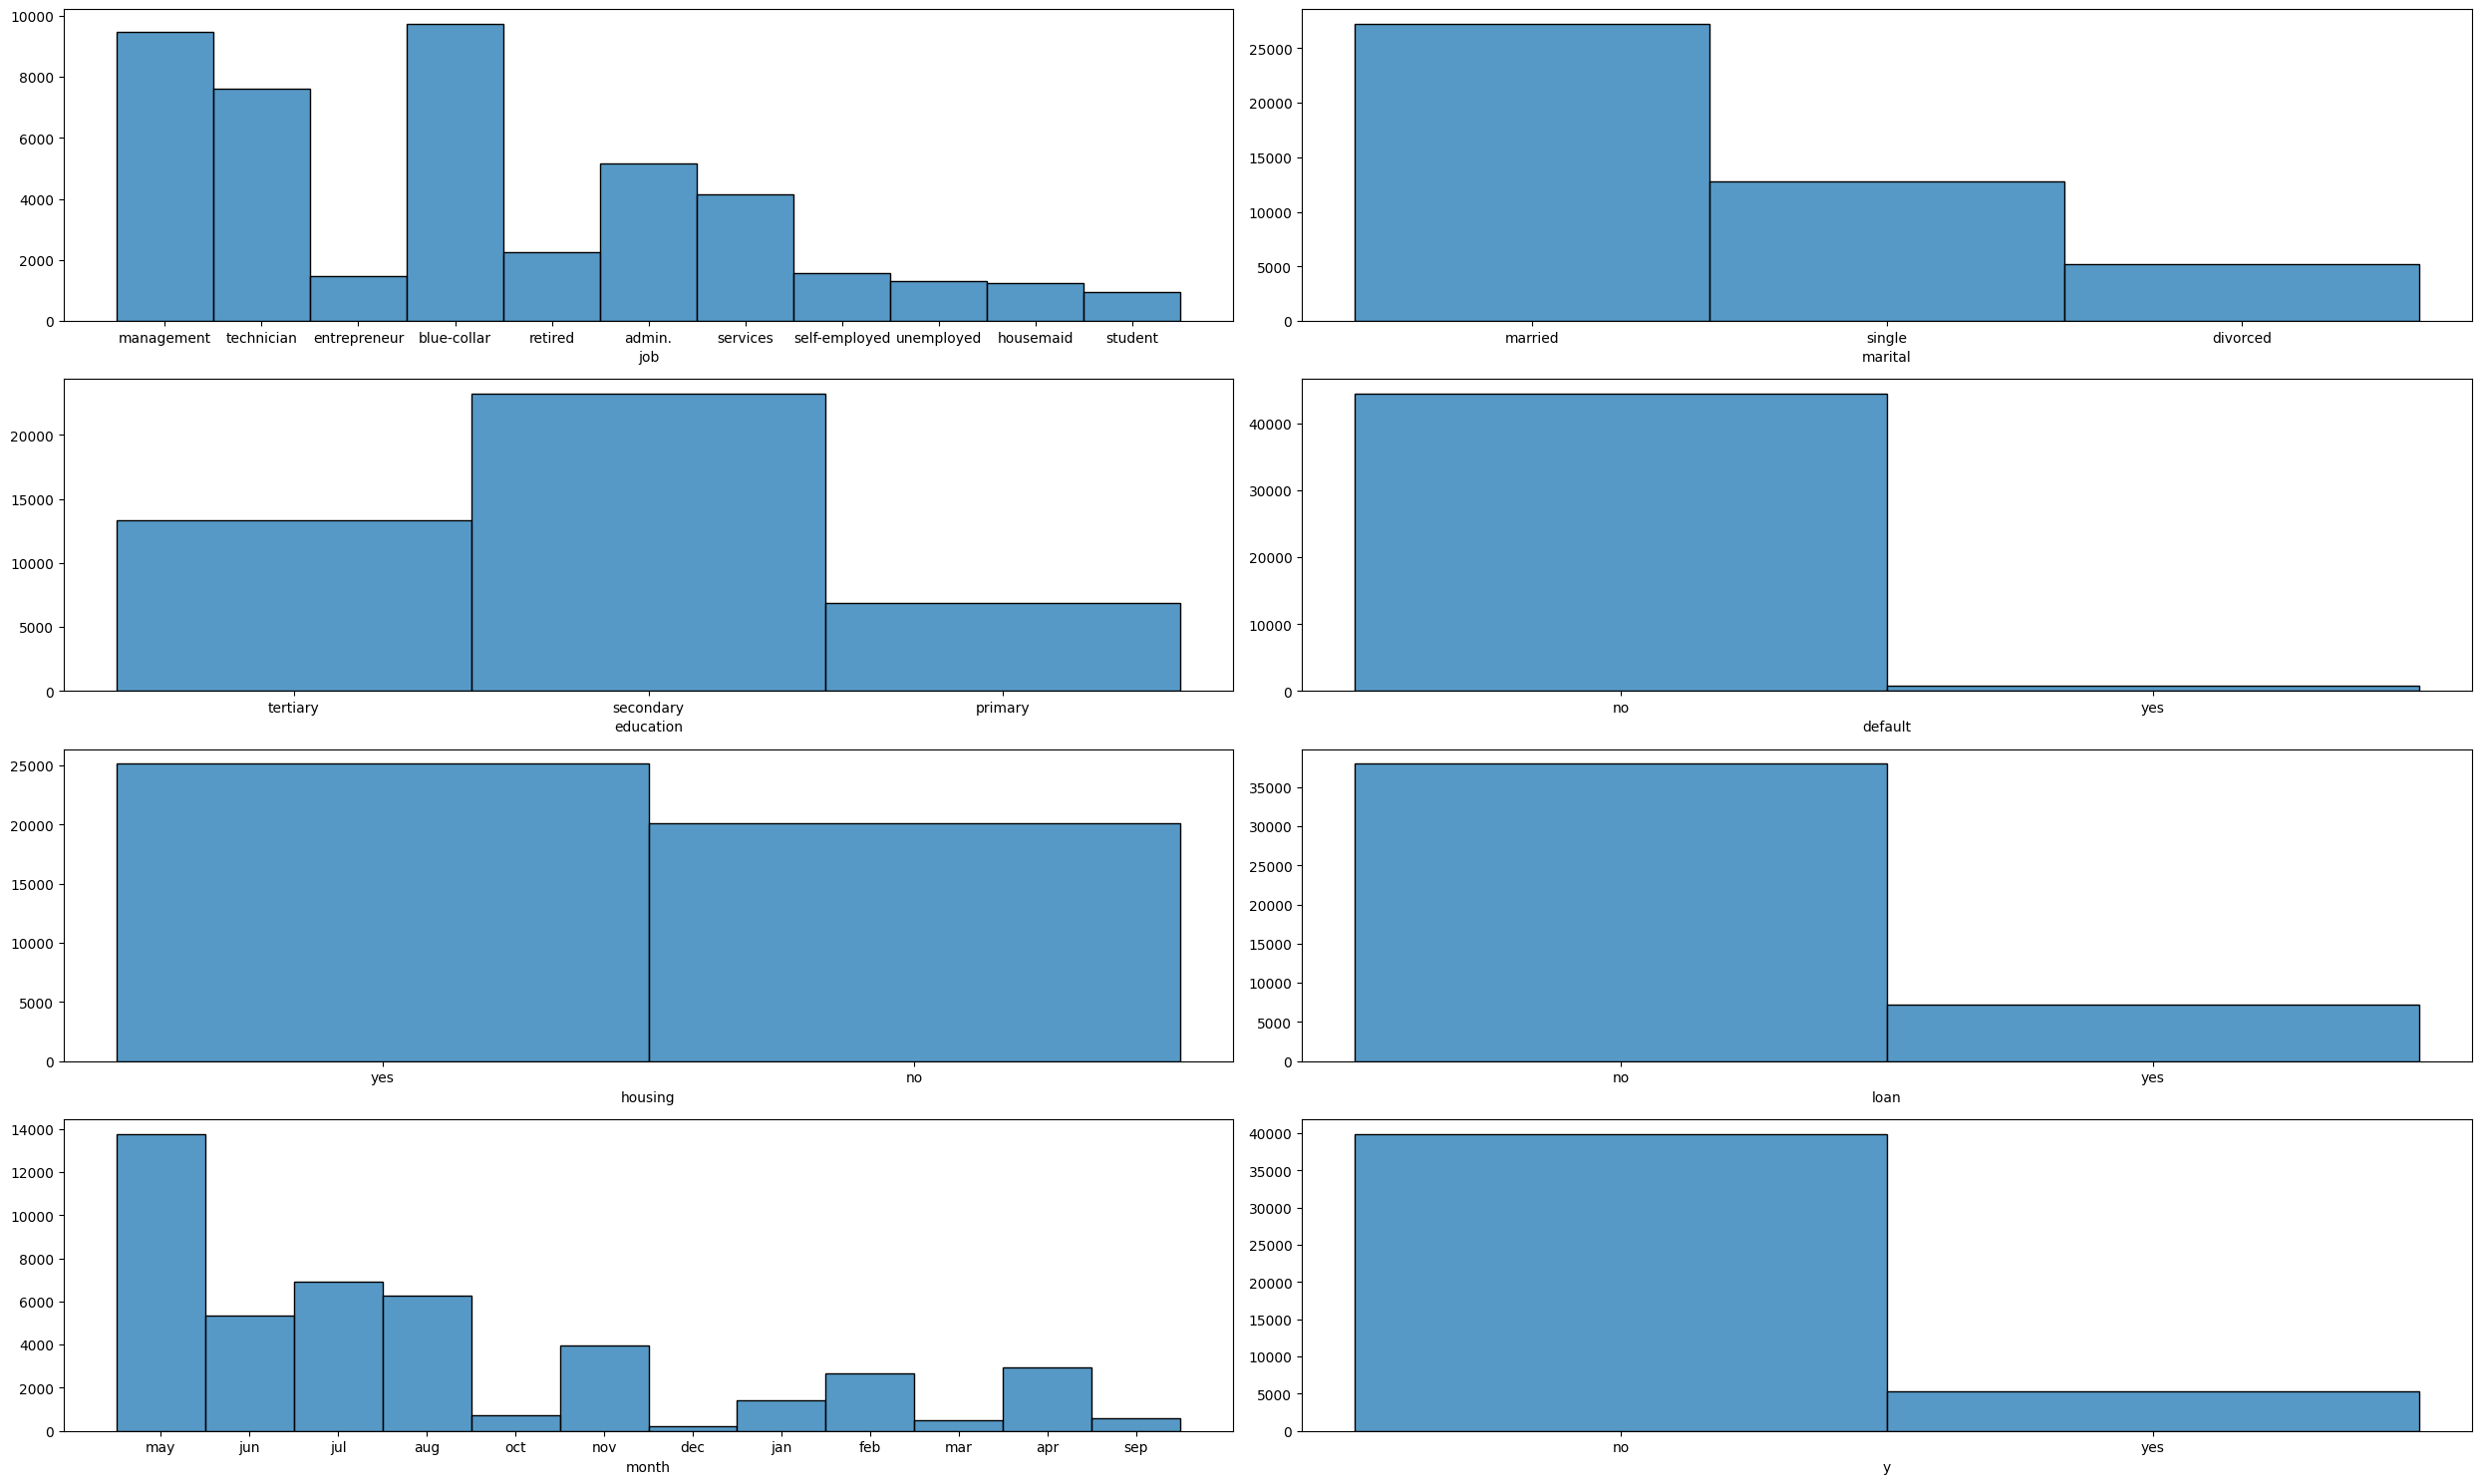

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (25, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "job").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = df, x = "y").set(ylabel = None)
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis numerico

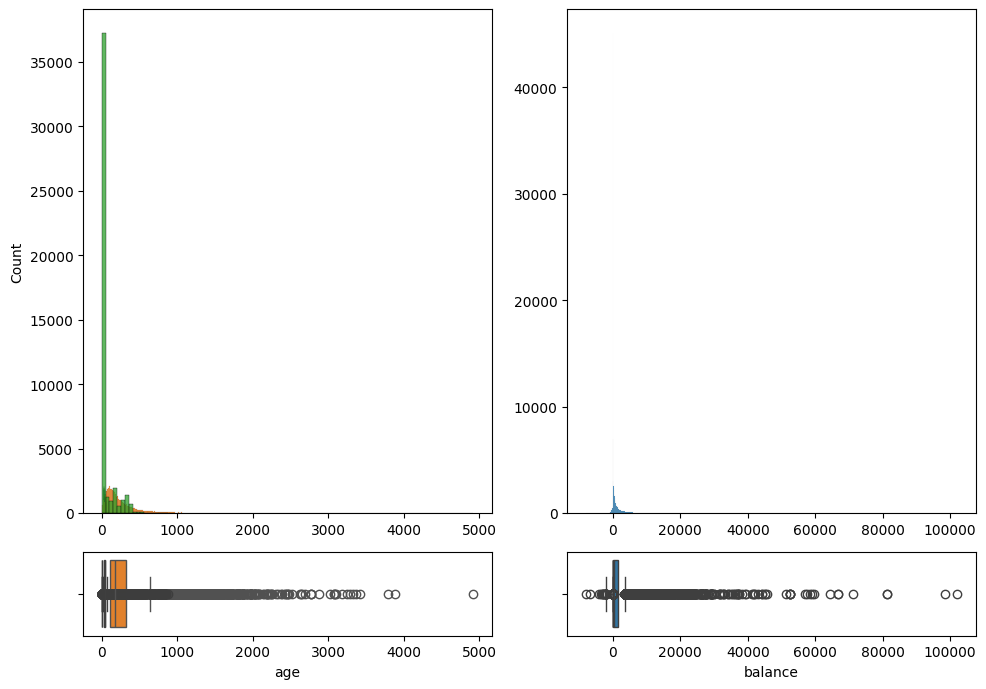

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "balance").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "balance")
sns.histplot(ax = axis[0, 0], data = df, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "duration")
sns.histplot(ax = axis[0, 1], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "campaign")
sns.histplot(ax = axis[0, 0], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "pdays")
sns.histplot(ax = axis[0, 1], data = df, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "previous")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis numerico multivariante

In [8]:
df["default_n"] = pd.factorize(df["default"])[0]

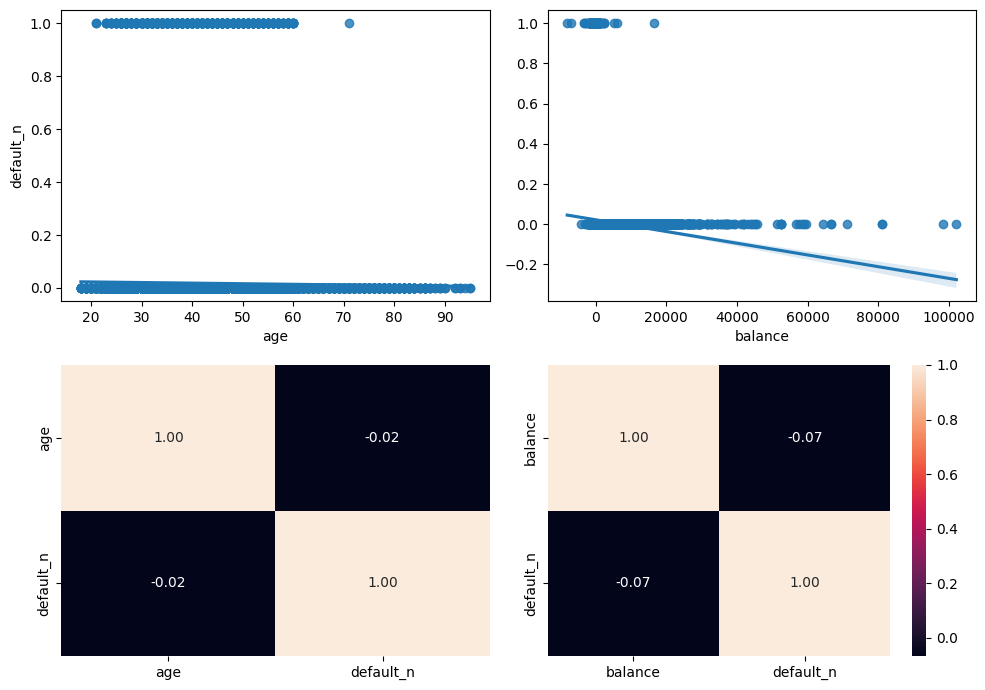

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "default_n")
sns.heatmap(df[["age", "default_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "balance", y = "default_n").set(ylabel=None)
sns.heatmap(df[["balance", "default_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

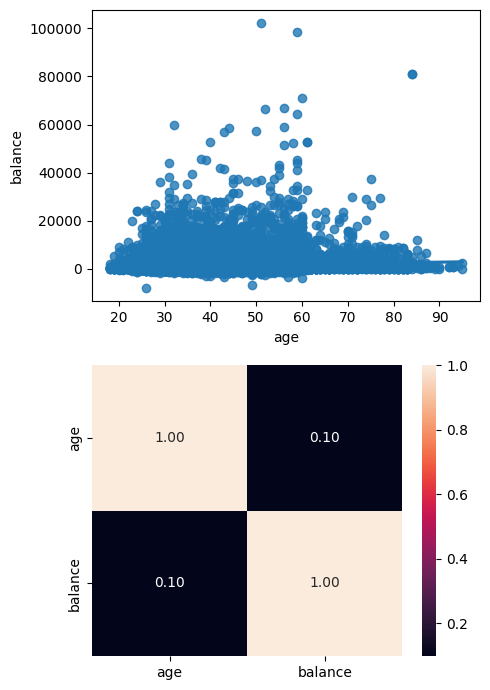

In [10]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "age", y = "balance")
sns.heatmap(df[["age", "balance"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis categorico-categorico

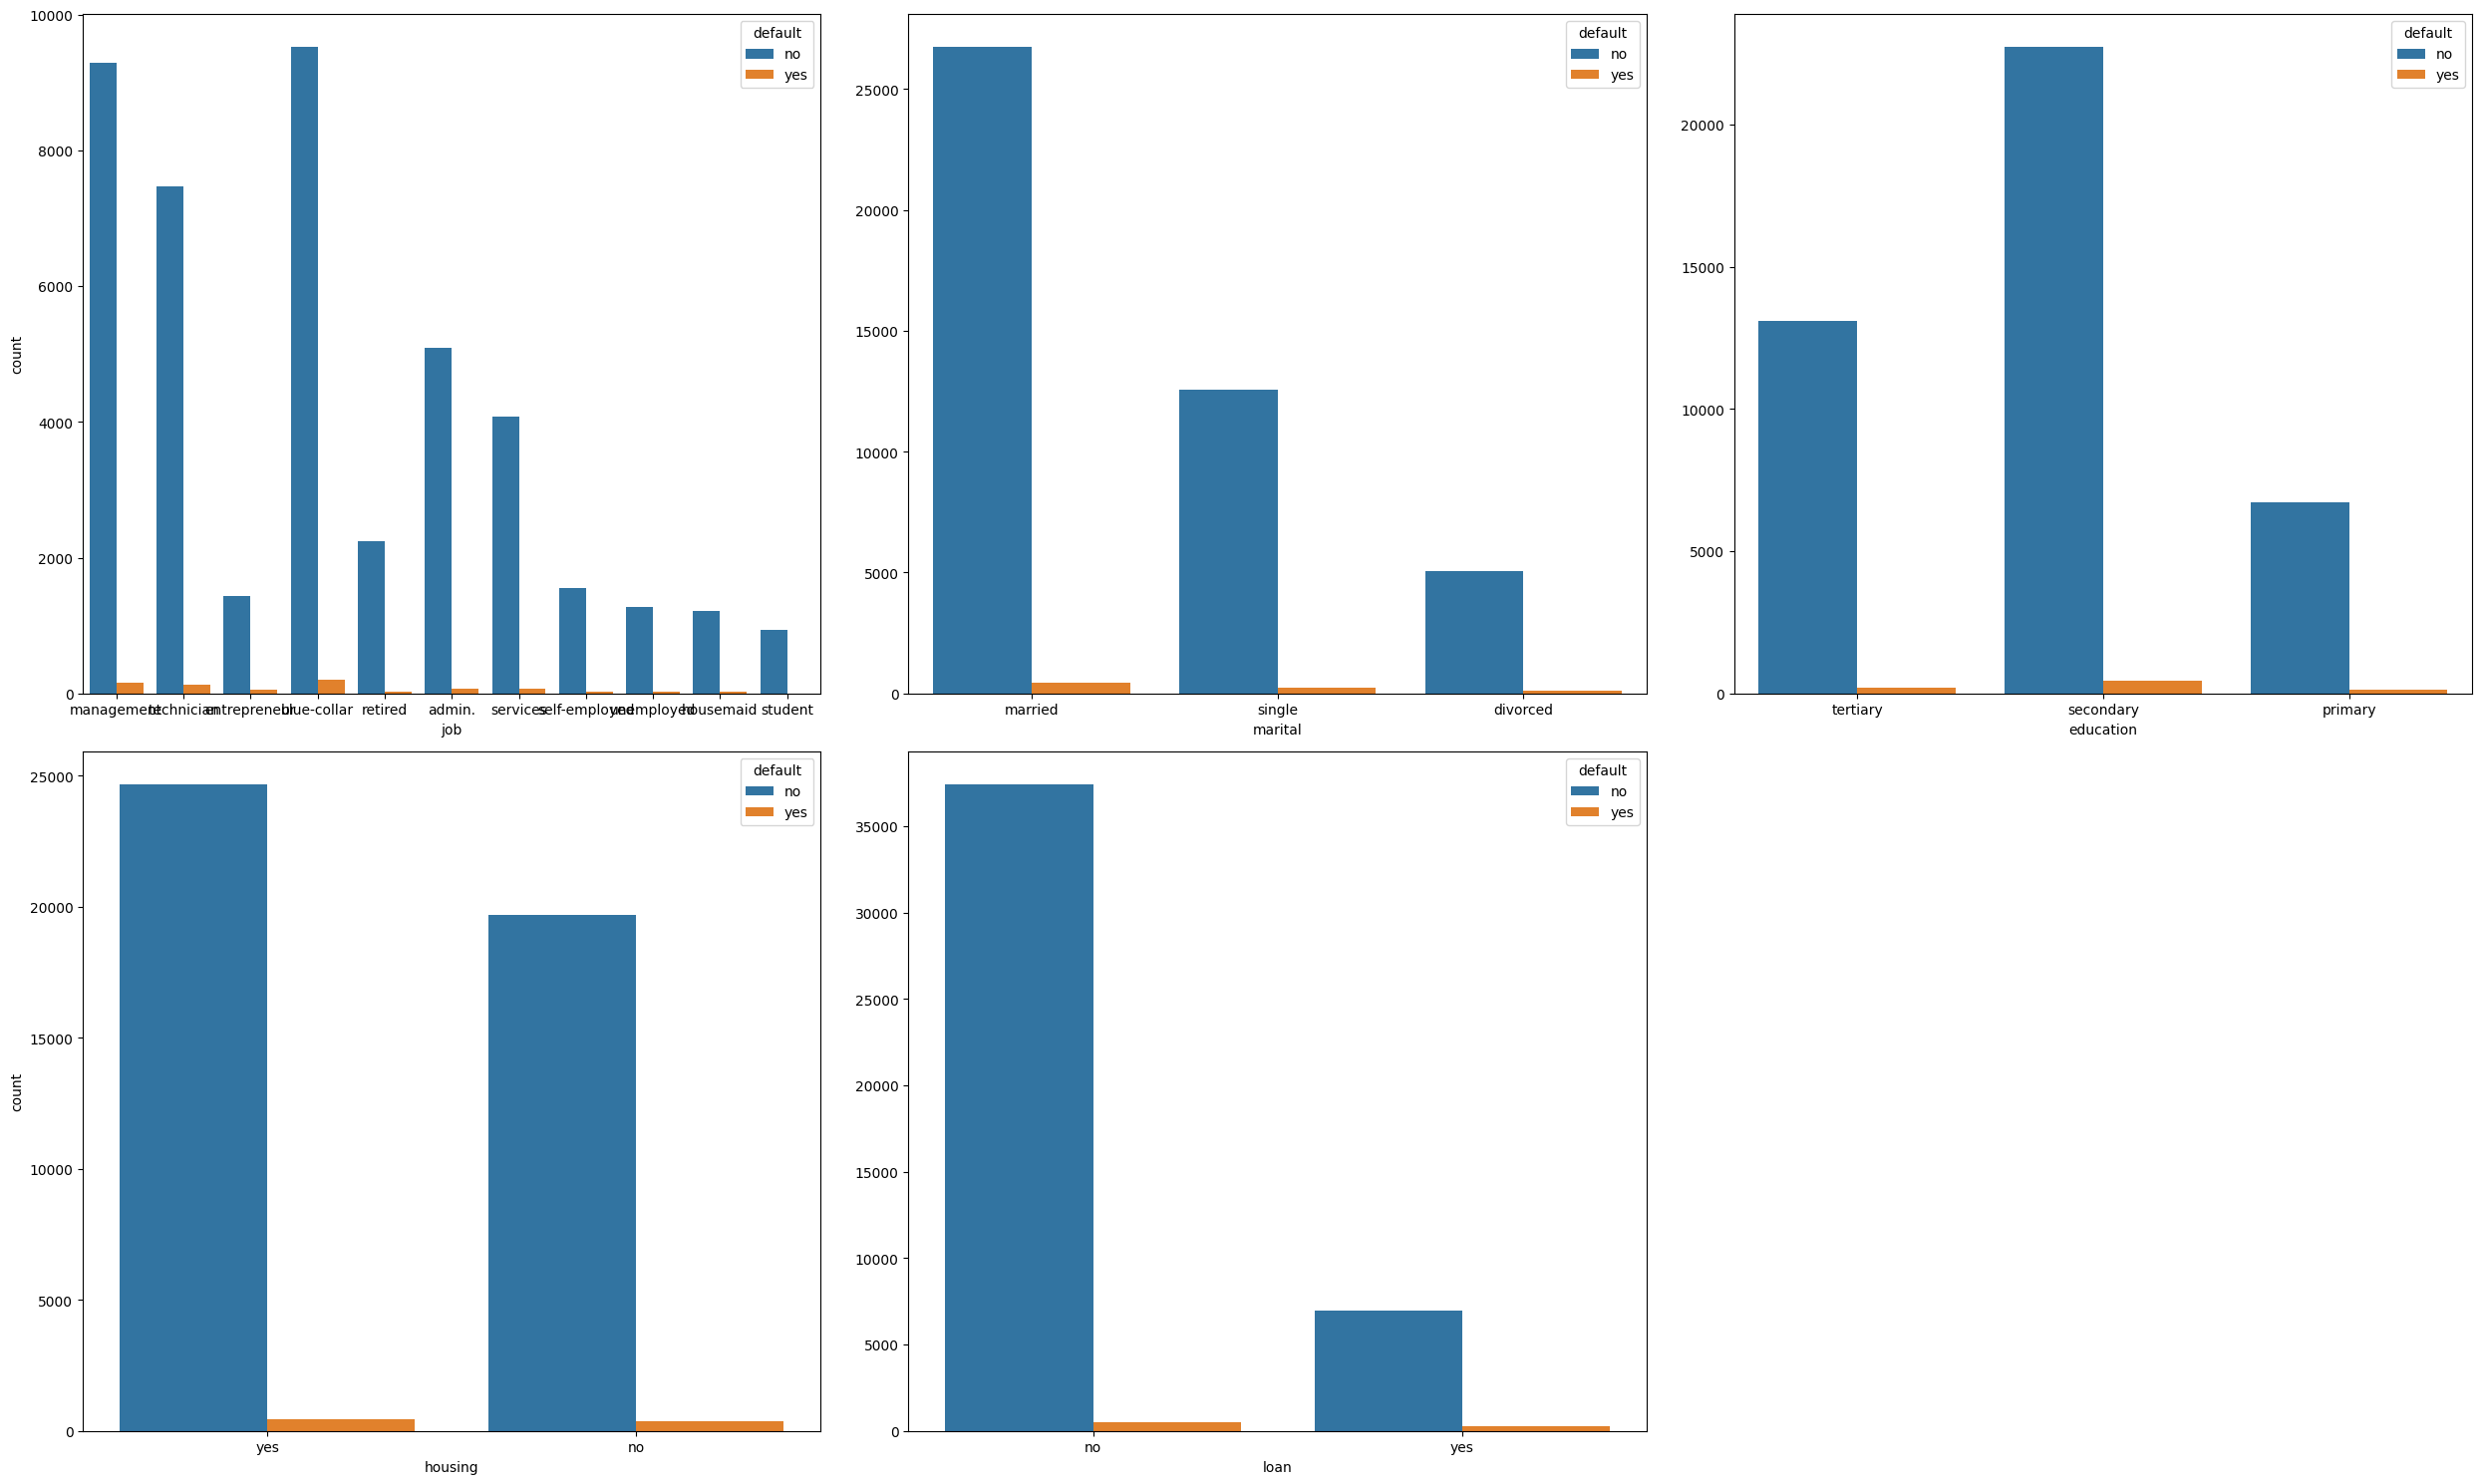

In [11]:
fig, axis = plt.subplots(2, 3, figsize = (25, 15))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "default")
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "default").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "default").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "housing", hue = "default")
sns.countplot(ax = axis[1, 1], data = df, x = "loan", hue = "default").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = df, x = "month", hue = "default")


plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Combinacion de clases

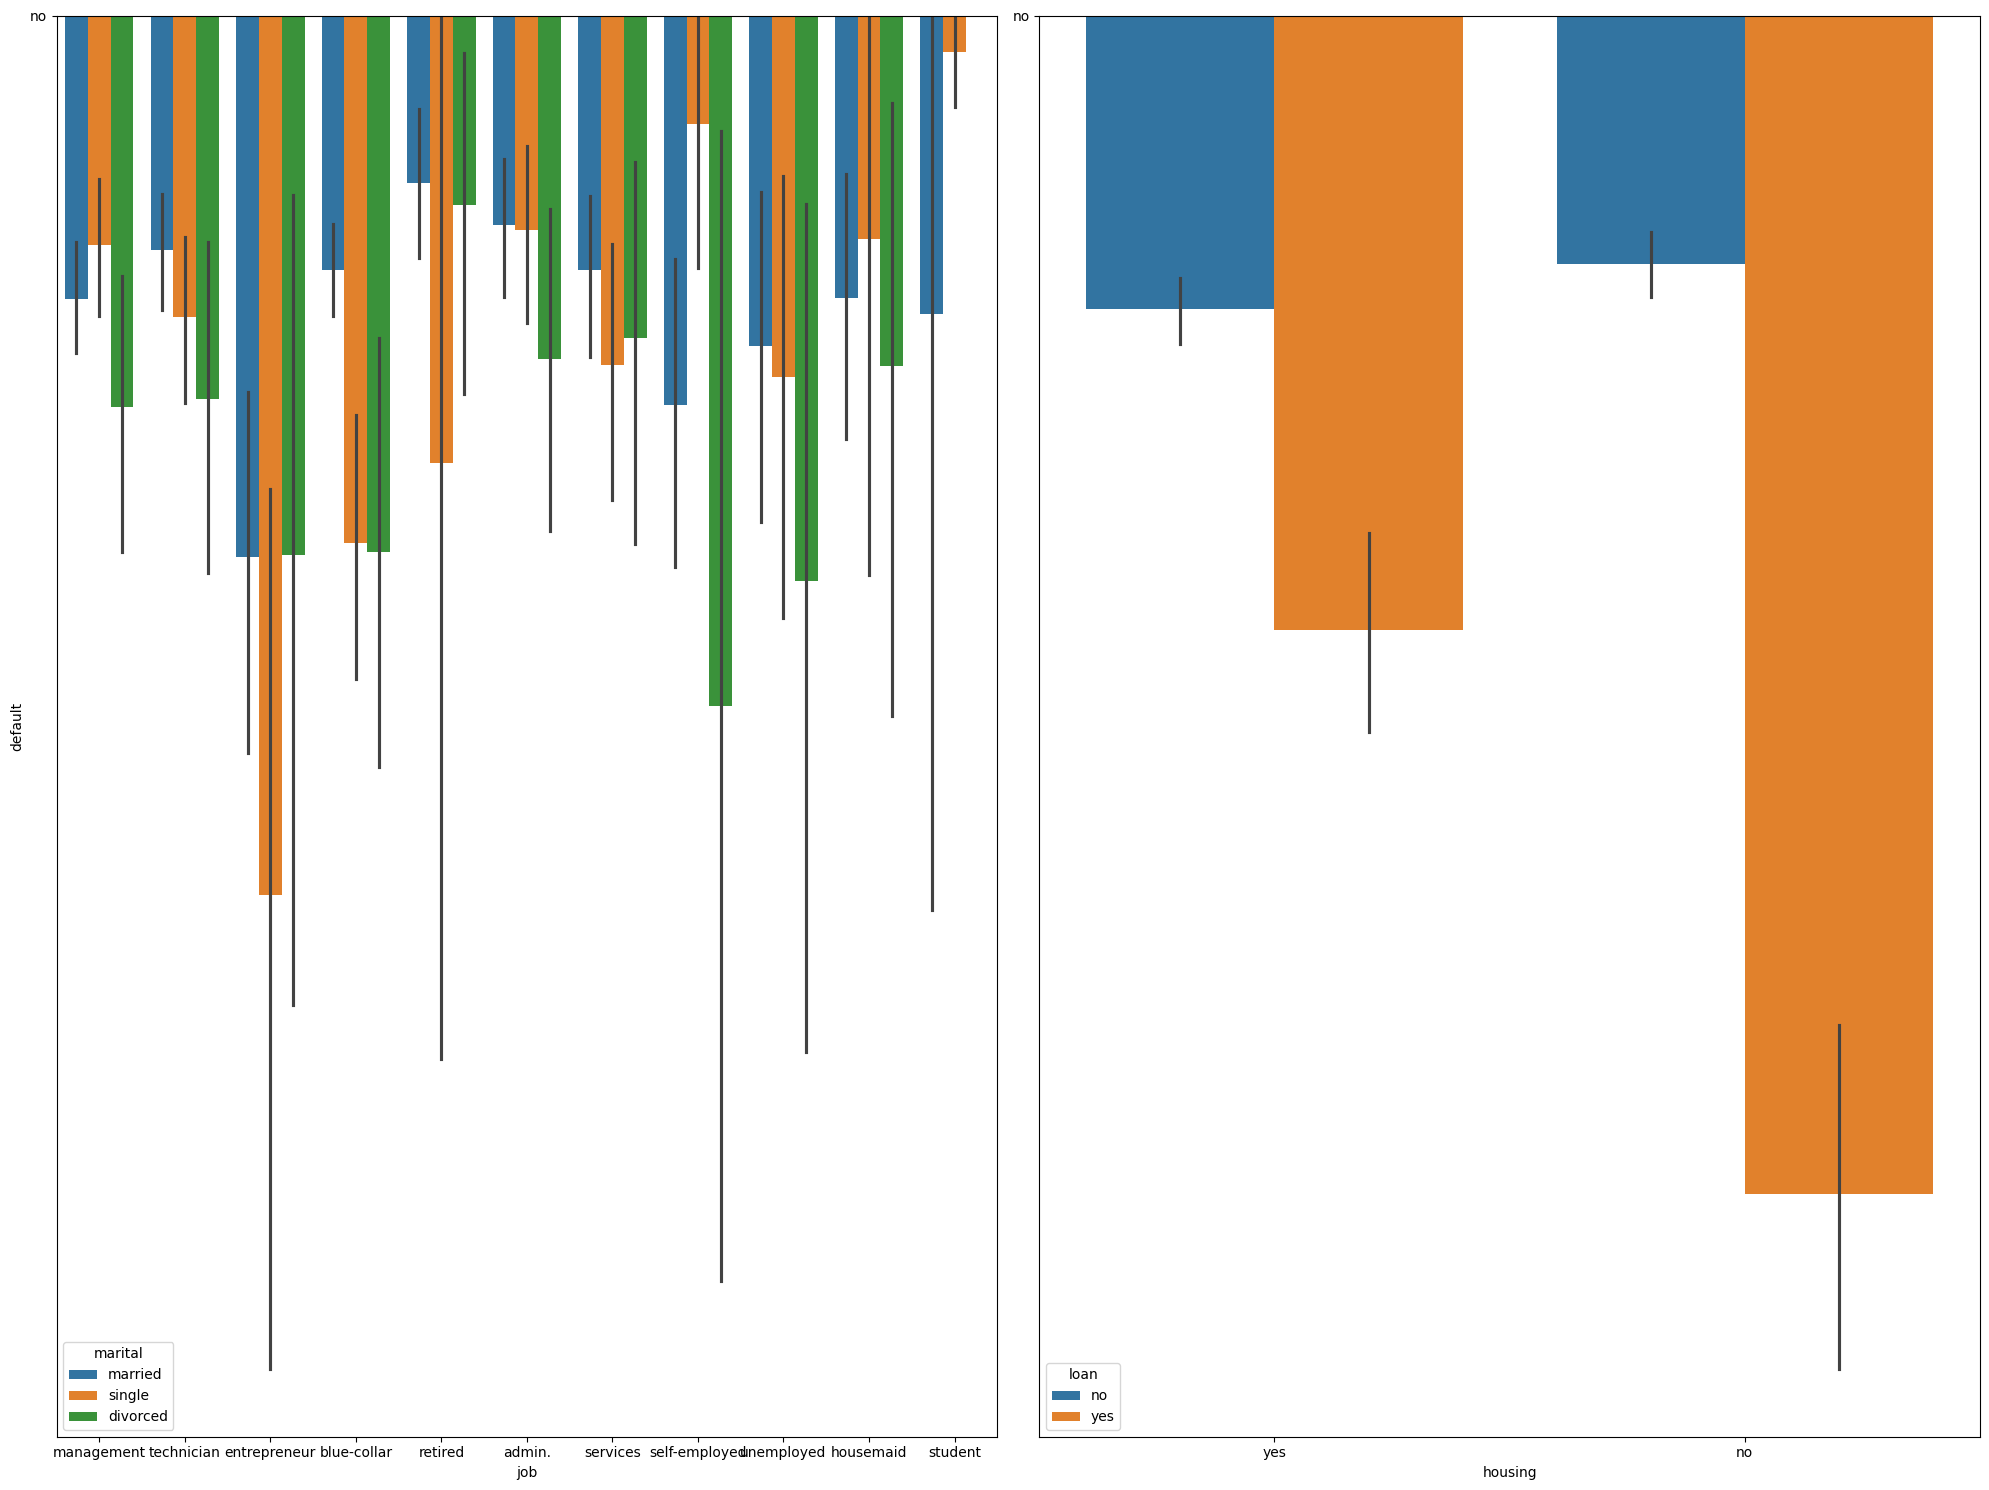

In [12]:
fig, axis = plt.subplots(figsize = (20, 15), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "job", y = "default", hue = "marital")
sns.barplot(ax = axis[1], data = df, x = "housing", y = "default", hue = "loan").set(ylabel = None)

plt.tight_layout()

plt.show()

Analisis de correlaciones

In [14]:
#Conversion de categoricos a numericos

df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["y_n"] = pd.factorize(df["y"])[0]

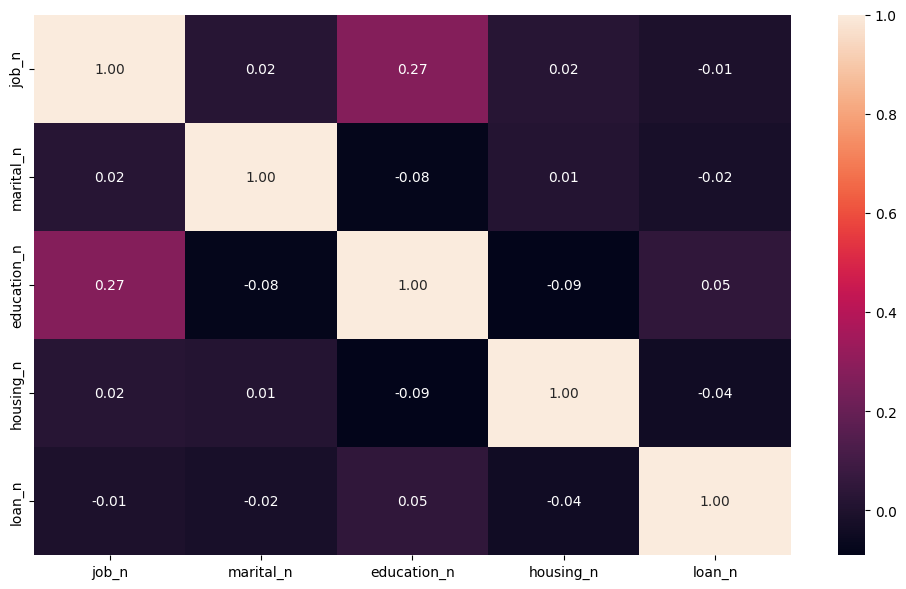

In [15]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["job_n", "marital_n", "education_n", "housing_n", "loan_n", ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

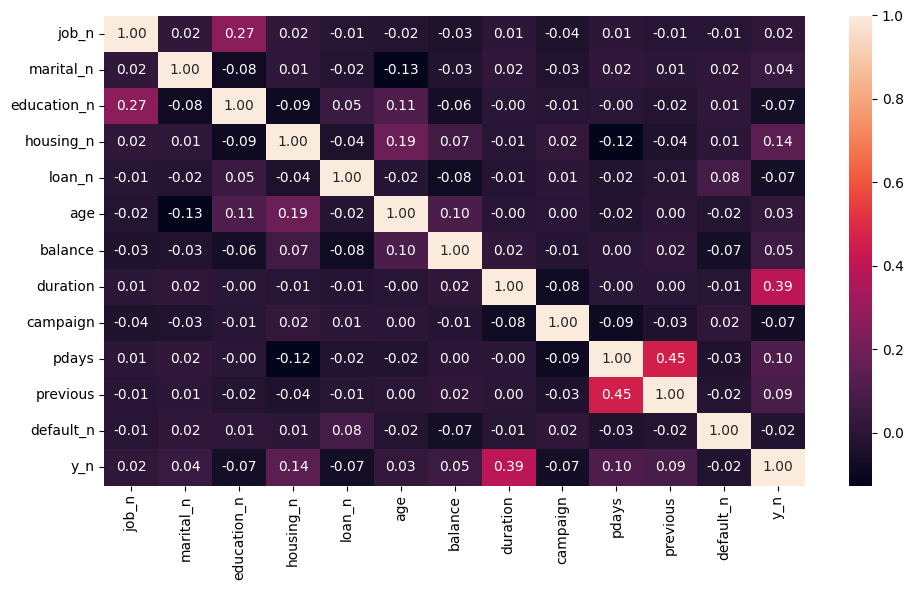

In [16]:
fig, axis = plt.subplots(figsize = (10, 6))
n_df = df[["job_n", "marital_n", "education_n", "housing_n", "loan_n", "age", "balance", "duration", "campaign", "pdays", "previous", "default_n", "y_n" ]]
sns.heatmap(n_df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

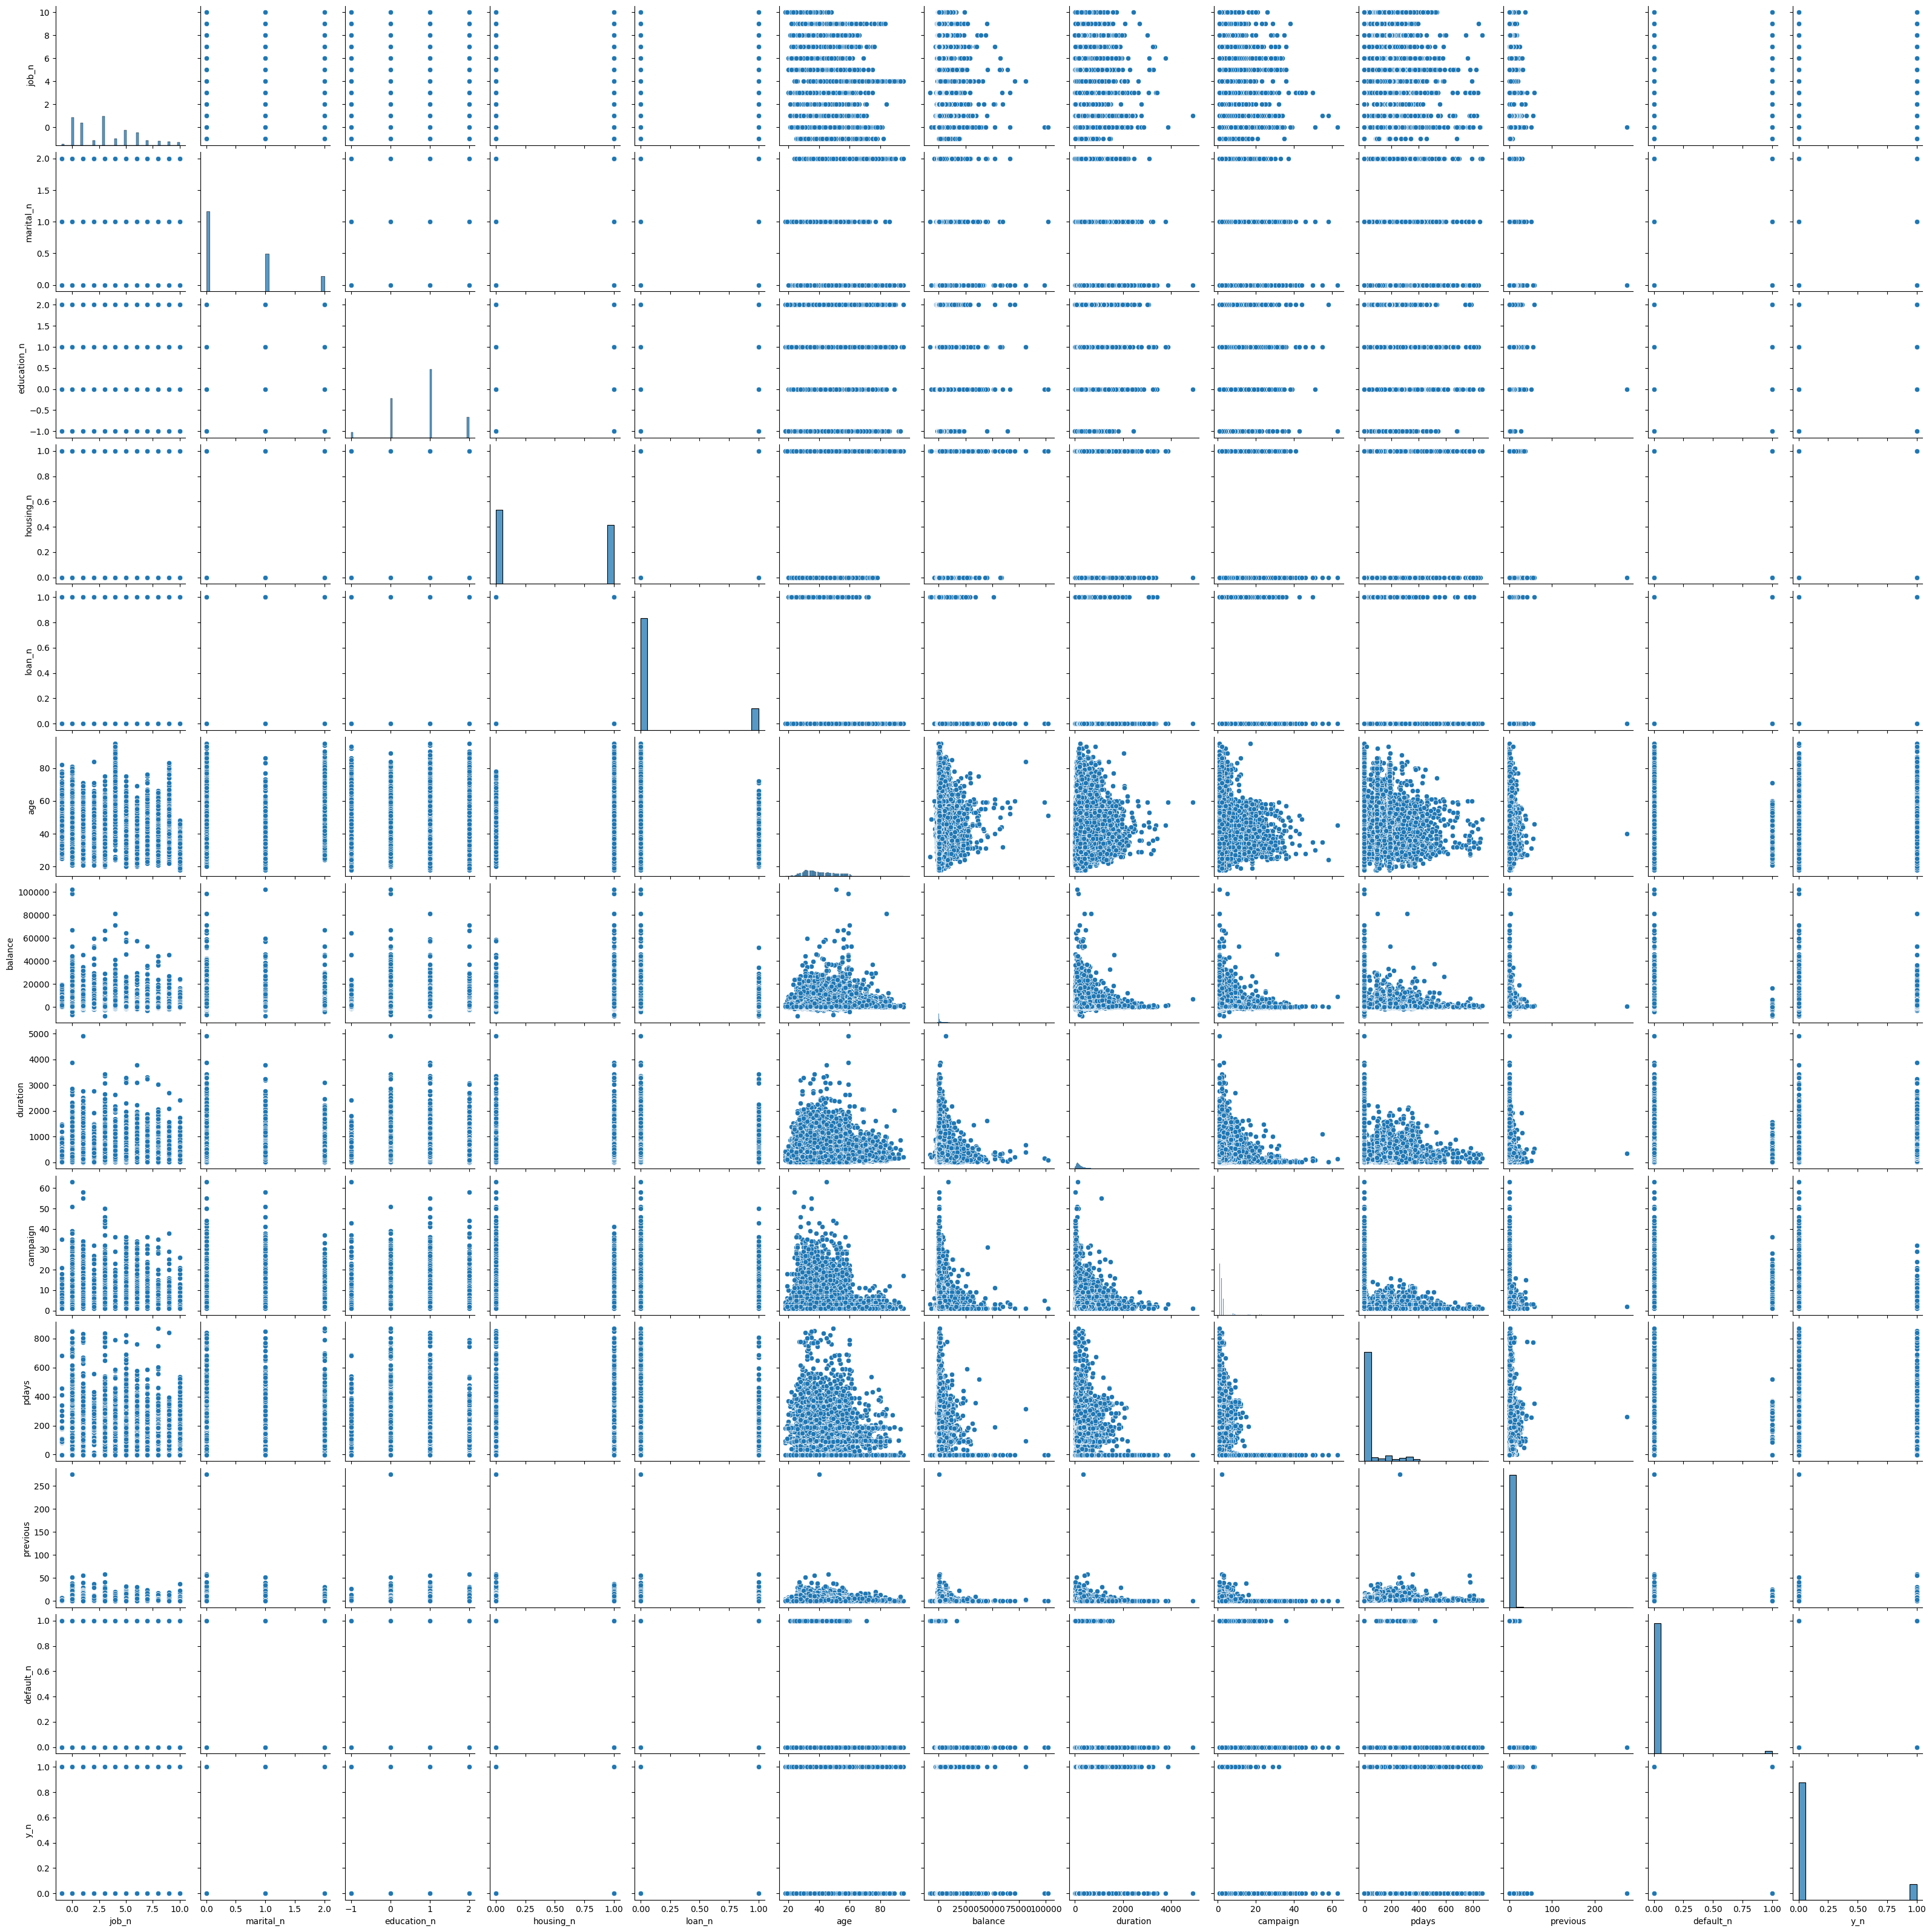

In [17]:
sns.pairplot(data = n_df)

Analisis de Outliers


In [18]:
n_df.describe()

,job_n,marital_n,education_n,housing_n,loan_n,age,balance,duration,campaign,pdays,previous,default_n,y_n
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,3.126031,0.513238,0.775187,0.444162,0.160226,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,0.018027,0.116985
std,2.700332,0.692948,0.747997,0.496878,0.366820,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,0.133049,0.321406
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,0.000000,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,10.000000,2.000000,2.000000,1.000000,1.000000,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000


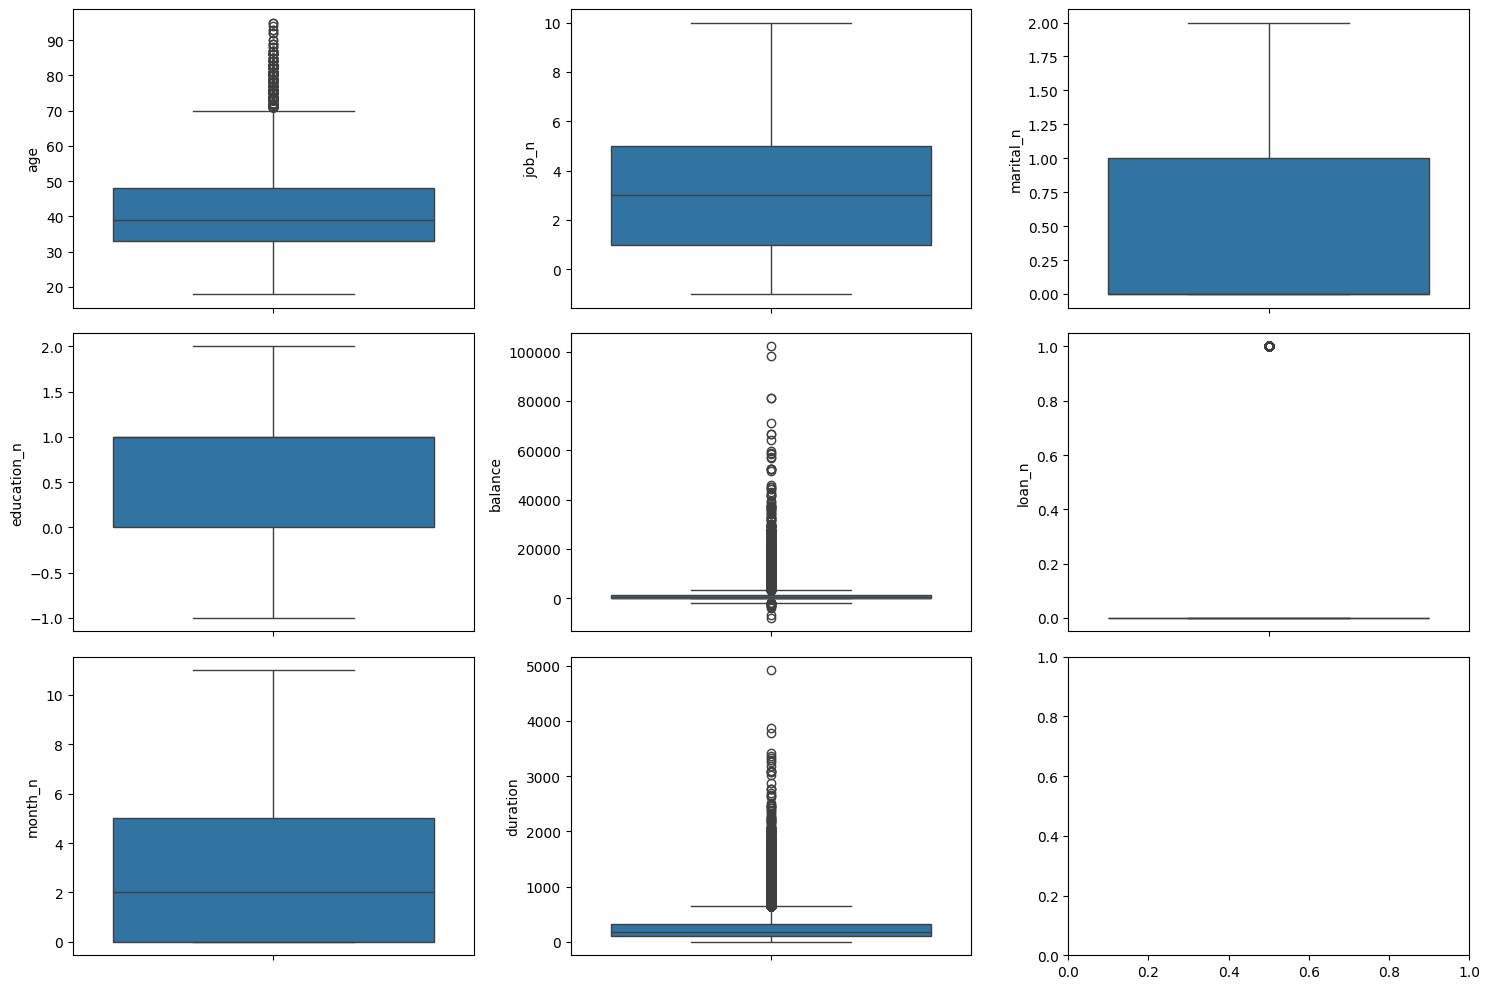

In [19]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "job_n")
sns.boxplot(ax = axis[0, 2], data = df, y = "marital_n")
sns.boxplot(ax = axis[1, 0], data = df, y = "education_n")
sns.boxplot(ax = axis[1, 1], data = df, y = "balance")
sns.boxplot(ax = axis[1, 1], data = df, y = "housing_n")
sns.boxplot(ax = axis[1, 2], data = df, y = "loan_n")
sns.boxplot(ax = axis[2, 0], data = df, y = "month_n")
sns.boxplot(ax = axis[2, 1], data = df, y = "duration")

plt.tight_layout()

plt.show()

Las variables afectadas por el utlier son "age", "balance" y "duration".

In [20]:
age_stats = df["age"].describe()
age_stats

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [21]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 70.5 y 10.5, con un rango intercuartílico de 15.0


In [22]:
balance_stats = df["balance"].describe()
balance_stats

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [23]:
balance_iqr = balance_stats["75%"] - balance_stats["25%"]
upper_limit = balance_stats["75%"] + 1.5 * balance_iqr
lower_limit = balance_stats["25%"] - 1.5 * balance_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(balance_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3462.0 y -1962.0, con un rango intercuartílico de 1356.0


In [24]:
duration_stats = df["duration"].describe()
duration_stats

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [25]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(balance_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 643.0 y -221.0, con un rango intercuartílico de 1356.0


In [26]:
n_df[n_df["balance"] > 8000]

,job_n,marital_n,education_n,housing_n,loan_n,age,balance,duration,campaign,pdays,previous,default_n,y_n
34,0,0,0,0,0,51,10635,336,1,-1,0,0,0
69,3,1,1,0,1,35,12223,177,1,-1,0,0,0
334,0,2,0,0,0,45,24598,313,3,-1,0,0,0
382,0,0,1,1,0,40,8486,260,3,-1,0,0,0
391,1,0,0,0,0,37,8730,149,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45097,7,0,0,1,0,61,10861,225,1,91,5,0,1
45098,1,1,-1,1,0,44,11115,189,1,185,4,0,0
45110,0,0,0,0,0,50,8205,293,3,508,1,0,0
45118,4,0,2,1,0,78,14204,150,1,183,1,0,0


Analisis de Valores Faltantes

In [27]:
n_df.isnull().sum().sort_values(ascending=False)

job_n          0
marital_n      0
education_n    0
housing_n      0
loan_n         0
age            0
balance        0
duration       0
campaign       0
pdays          0
previous       0
default_n      0
y_n            0
dtype: int64

Escalado de Valores

In [28]:
from sklearn.model_selection import train_test_split

num_variables = ["job_n", "marital_n", "education_n", "housing_n", "loan_n", "age", "balance", "duration", "previous"]

# Dividimos el conjunto de datos en muestras de train y test
X = n_df.drop("default_n", axis = 1)[num_variables]
y = n_df["default_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,job_n,marital_n,education_n,housing_n,loan_n,age,balance,duration,previous
3344,3,0,2,0,0,41,849,72,0
17965,1,0,2,0,0,49,1415,269,0
18299,5,0,1,1,0,42,3842,130,0
10221,0,1,0,0,0,37,-119,375,0
32192,3,0,2,1,0,56,3498,264,0


Normalizacion

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,job_n,marital_n,education_n,housing_n,loan_n,age,balance,duration,previous
3344,-0.049213,-0.739370,1.636573,-0.892343,-0.438594,0.006515,-0.169381,-0.719756,-0.244772
17965,-0.790542,-0.739370,1.636573,-0.892343,-0.438594,0.759937,0.017848,0.047138,-0.244772
18299,0.692116,-0.739370,0.297306,1.120646,-0.438594,0.100693,0.820681,-0.493970,-0.244772
10221,-1.161206,0.705571,-1.041961,-0.892343,-0.438594,-0.370196,-0.489588,0.459781,-0.244772
32192,-0.049213,-0.739370,1.636573,1.120646,-0.438594,1.419181,0.706889,0.027674,-0.244772


Escalado min y max

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,job_n,marital_n,education_n,housing_n,loan_n,age,balance,duration,previous
3344,0.363636,0.0,1.000000,0.0,0.0,0.298701,0.080511,0.014640,0.0
17965,0.181818,0.0,1.000000,0.0,0.0,0.402597,0.085650,0.054697,0.0
18299,0.545455,0.0,0.666667,1.0,0.0,0.311688,0.107684,0.026434,0.0
10221,0.090909,0.5,0.333333,0.0,0.0,0.246753,0.071723,0.076251,0.0
32192,0.363636,0.0,1.000000,1.0,0.0,0.493506,0.104561,0.053680,0.0


Seleccion de Caracteristicas

In [34]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 8 decimos implícitamente que queremos eliminar 1 característica del conjunto de datos
selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,job_n,marital_n,education_n,loan_n,age,balance,duration,previous
0,3,0,2,0,41,849,72,0
1,1,0,2,0,49,1415,269,0
2,5,0,1,0,42,3842,130,0
3,0,1,0,0,37,-119,375,0
4,3,0,2,0,56,3498,264,0


In [35]:
X_test_sel.head()

,job_n,marital_n,education_n,loan_n,age,balance,duration,previous
0,3,0,1,0,40,580,192,0
1,6,1,1,0,47,3644,83,0
2,10,1,0,0,25,538,226,0
3,0,0,0,0,42,1773,311,1
4,0,0,0,1,56,217,121,0


Guardado en crudo

In [36]:
X_train_sel["default_n"] = list(y_train)
X_test_sel["default_n"] = list(y_test)

In [37]:
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Inicializacion y entrenamiento del modelo

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediccion del Modelo

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9043,))

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.984297246488997

Podemos observar que el modelo base de la regresion logistica obtiene 98% de precision. 

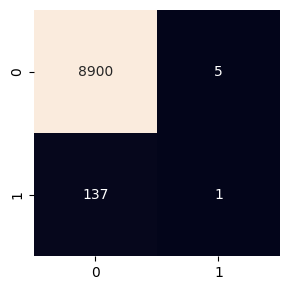

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Se obtuvieron 8900 Verdaderos Positivos, 1 Verdaderos Negativos, 137 Falsos Positivos y 5 Falsos Negativos.

Optimizacion de parametros

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.984297246488997

Se sigue opteniendo del modelo base una precision 98%.


Busqueda en Cuadricula

In [43]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [45]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [46]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9841866637177927

Podemos ver que el modelo no tuvo una mejora aplicando los hiperparametros ya que el 98% de precision no mejoro. Aunque por el resultado que obtuvimos del modelo obtenemos un alto indice de presion, el cual si nos sirve para identificar clientes que estarian dispuestos a tomar un deposito a largo plazo.